In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_values = pd.read_csv("../data/raw/test_values.csv")

In [3]:
test_values.shape

(86868, 39)

In [4]:
test_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.686800e+04,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,...,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,5.266279e+05,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,...,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,3.037828e+05,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,...,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,7.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.644215e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.269835e+05,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890842e+05,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052923e+06,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
test_values.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [7]:
df_obj = test_values.select_dtypes(include="object")
for i in df_obj.columns:
    print(test_values.loc[:, i].unique())

['t' 'n' 'o']
['r' 'w' 'u' 'h' 'i']
['n' 'x' 'q']
['f' 'v' 'x' 'm' 'z']
['q' 'j' 'x' 's']
['s' 't' 'j' 'o']
['d' 'u' 'q' 'a' 'c' 'm' 's' 'o' 'f' 'n']
['v' 'a' 'w' 'r']


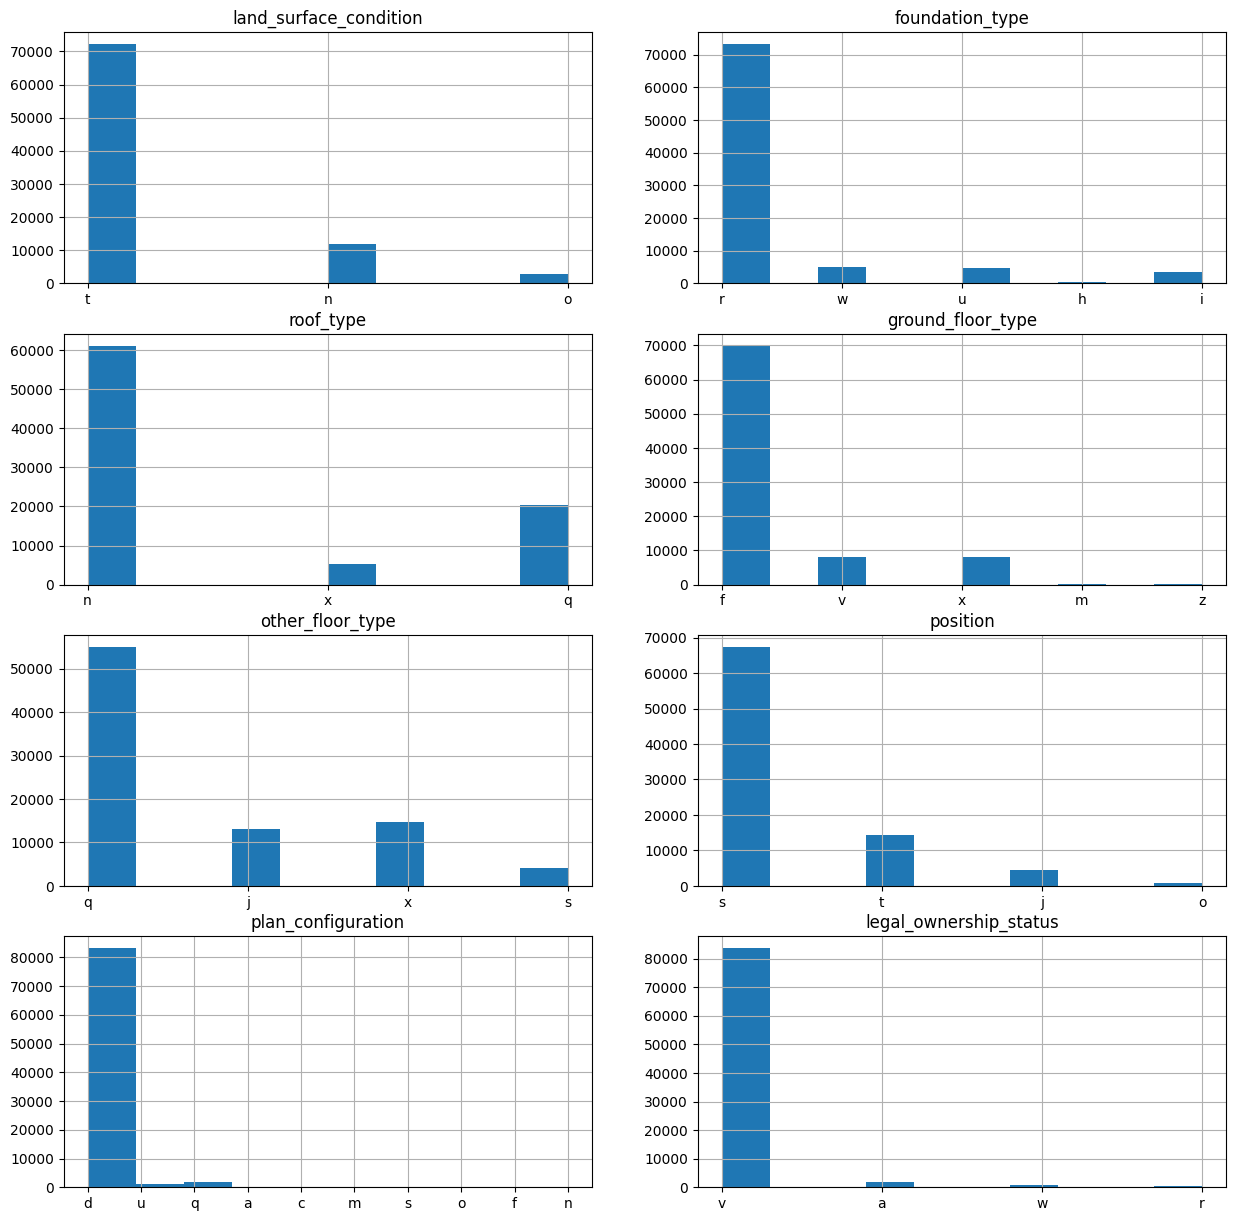

In [12]:
f, axarr = plt.subplots(4, 2, figsize=(15, 15))
for i, col in enumerate(df_obj):
    ax = axarr.flat[i]
    test_values[col].hist(ax=ax)
    ax.set_title(col)

In [16]:
df_int = test_values.select_dtypes(include="int64")
df_int.shape

(86868, 31)

In [17]:
df_int = df_int.drop(
    columns=["building_id", "geo_level_1_id", "geo_level_2_id", "geo_level_3_id"]
)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'count_floors_pre_eq'),
  Text(2, 0, 'age'),
  Text(3, 0, 'area_percentage'),
  Text(4, 0, 'height_percentage')])

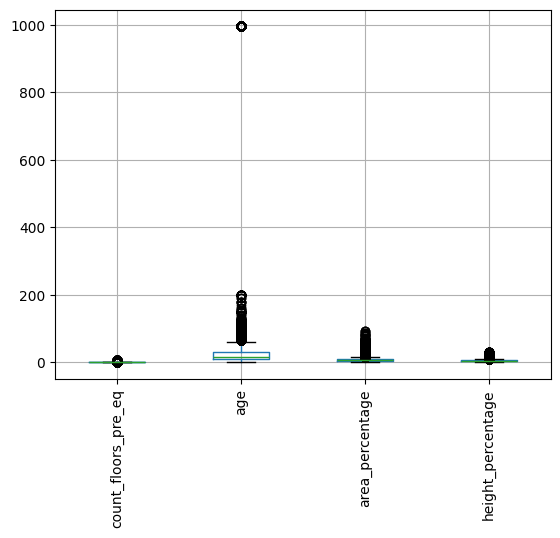

In [21]:
df_int.iloc[:, 0:4].boxplot()
plt.xticks(rotation=90)

(array([1, 2, 3, 4]),
 [Text(1, 0, 'count_floors_pre_eq'),
  Text(2, 0, 'age'),
  Text(3, 0, 'area_percentage'),
  Text(4, 0, 'height_percentage')])

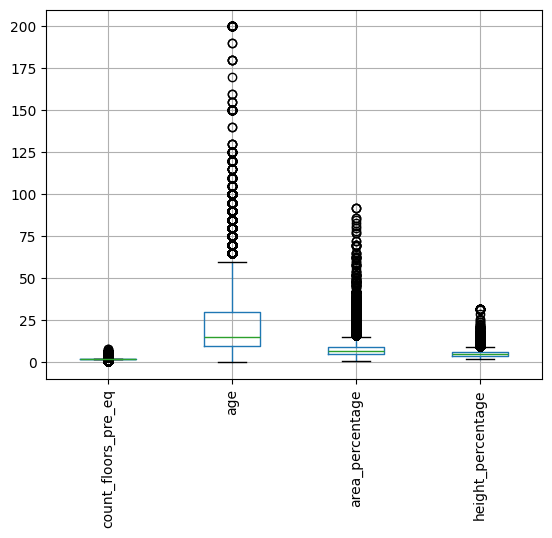

In [22]:
df_wo_age = df_int.loc[~(df_int.loc[:, "age"] == 995), :]
df_wo_age.iloc[:, 0:4].boxplot()
plt.xticks(rotation=90)